In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import math

# 1: Implement lại các loss và r_squared bằng numpy

In [2]:
def mse(y_true: np.array, y_pred: np.array):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true: np.array, y_pred: np.array):
    return math.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true: np.array, y_pred: np.array):
    return np.mean(np.absolute(y_true - y_pred))

def mape(y_true: np.array, y_pred: np.array):
    return np.mean(np.absolute(y_true - y_pred) / y_true) * 100


In [3]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
26.666666666666668





# 2: Implement lại Ridge Regression

In [4]:
import numpy as np

class RidgeRegression:
    def __init__(self):
        self.w = None #khởi tạo tham số

    def fit(self, X, y, lambda_=0.1):
        m, n = X.shape #lấy shape của X
        I = np.identity(n) #tạo ra ma trận identity với n*n
        self.w = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
        # công thức tính w

    def predict(self, new_X):
        return np.dot(new_X, self.w)

# 3: Tạo dữ liệu toy_data

In [5]:
def create_toy_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    #tạo ra mảng 1 chiều từ 0 - 1 với 100 phần tử
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    #tạo ra giá trị mô phỏng sin(2πx) và nhiễu
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

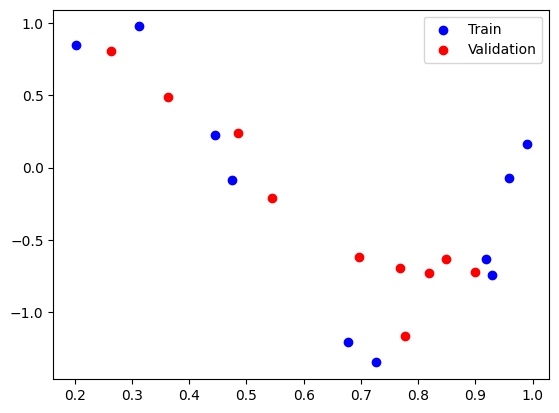

In [6]:
#tạo dữ liệu gốc
x, t = create_toy_data(func, sample_size=100, standard_deviation=0.25)

indices = np.random.permutation(len(x))
#danh sách trộn ngẫu nhiên các index của các phần tử trong tập dữ liệu gốc

train_indices = indices[:10]
#lấy 10 index đầu của danh sách

val_indices = indices[10:20]
#lấy 10 index tiếp theo của danh sách

x_train, t_train = x[train_indices], t[train_indices]
x_val, t_val = x[val_indices], t[val_indices]


# Visualize các dữ liệu trên với 2 màu khác nhau cho mỗi bộ dữ liệu
plt.scatter(x_train, t_train, color='blue', label='Train')
plt.scatter(x_val, t_val, color='red', label='Validation')
plt.legend()
plt.show()

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

In [7]:
#fit và tính loss xong mới visualise

#Tạo ma trận variable cho đa thức bậc degree
def create_design_matrix(x, degree):
    X = np.ones((len(x), degree + 1)) 
    # Khởi tạo ma trận toàn 1 với degree + 1 cột

    for i in range(1, degree + 1):
        X[:, i] = x ** i 
    # Tính giá trị cột thứ i của ma trận X theo từng degree
    return X

for degree in range(10):
    #Tạo matrix cho X train và X val
    X_train = create_design_matrix(x_train, degree)
    X_val = create_design_matrix(x_val, degree)
    
    #tìm model (fit) cho x train và t train vào model
    model = RidgeRegression()
    model.fit(X_train, t_train)
    
    # Predict bằng X train và X val
    t_train_pred = model.predict(X_train)
    t_val_pred = model.predict(X_val)
    
    # Tính loss của t train và t validation
    loss_train = mse(t_train_pred, t_train)
    loss_val = mse(t_val_pred, t_val)
    
    print(f"Degree: {degree}, Train loss: {loss_train:.4f}, Validation loss: {loss_val:.4f}")


Degree: 0, Train loss: 0.5654, Validation loss: 0.3832
Degree: 1, Train loss: 0.3795, Validation loss: 0.1497
Degree: 2, Train loss: 0.3673, Validation loss: 0.1476
Degree: 3, Train loss: 0.2990, Validation loss: 0.1166
Degree: 4, Train loss: 0.2231, Validation loss: 0.0797
Degree: 5, Train loss: 0.1636, Validation loss: 0.0555
Degree: 6, Train loss: 0.1227, Validation loss: 0.0460
Degree: 7, Train loss: 0.0966, Validation loss: 0.0471
Degree: 8, Train loss: 0.0810, Validation loss: 0.0539
Degree: 9, Train loss: 0.0727, Validation loss: 0.0627


## Nhận xét:

# 3c: Với mỗi mô hình, tính loss train/val và nhận xét xem mô hình bị overfitting hay underfitting.

## Nhận xét

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

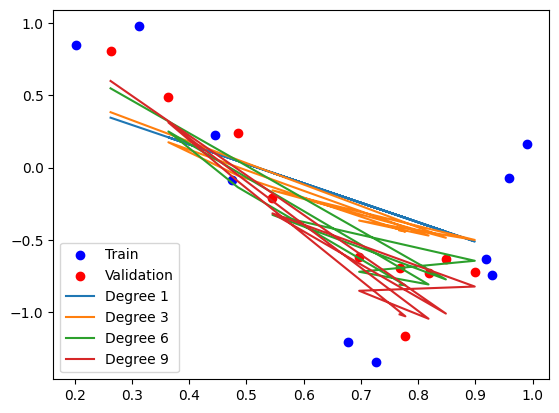

In [16]:
#scatter dữ liệu
plt.scatter(x_train, t_train, color='blue', label='Train')
plt.scatter(x_val, t_val, color='red', label='Validation')

#vẽ model 1, 3, 6, 9
degrees = [1, 3, 6, 9]
for degree in degrees:
    #fit model với tập train
    X_train = create_design_matrix(x_train, degree)
    model = RidgeRegression()
    model.fit(X_train, t_train)
    
    #visualise chỉ trên tập val
    X_val = create_design_matrix(x_val, degree)
    y_val_pred = model.predict(X_val)
    
    plt.plot(x_val, y_val_pred, label=f'Degree {degree}')
    
plt.legend()
plt.show()


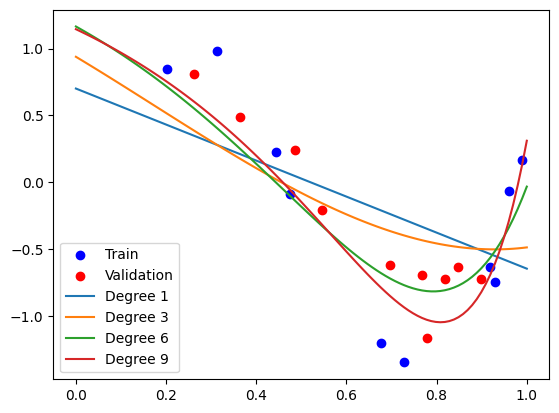

In [11]:
#scatter dữ liệu
plt.scatter(x_train, t_train, color='blue', label='Train')
plt.scatter(x_val, t_val, color='red', label='Validation')

#vẽ model 1, 3, 6, 9
degrees = [1, 3, 6, 9]
for degree in degrees:
    #fit model với tập train
    X_train = create_design_matrix(x_train, degree)
    model = RidgeRegression()
    model.fit(X_train, t_train)
    
    #visualise trên toàn tập dữ liệu
    X_train_all = create_design_matrix(x, degree)
    y_range = model.predict(X_train_all)
    
    plt.plot(x, y_range, label=f'Degree {degree}')
    
plt.legend()
plt.show()

## Nhận xét:

# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

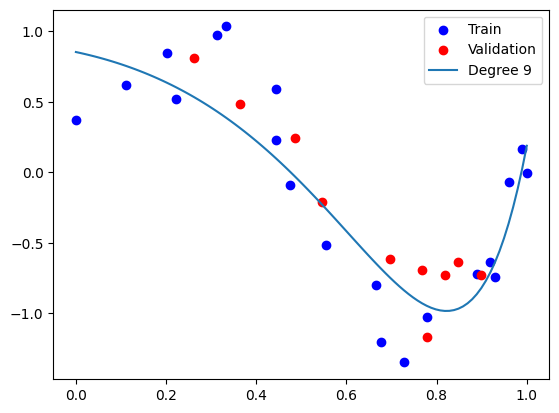

In [21]:
# Tạo 10 điểm dữ liệu mới
x_new, t_new = create_toy_data(func, sample_size=10, standard_deviation=0.25)

# Gộp 10 điểm mới vào tập train ban đầu
x_train_new = np.concatenate([x_train, x_new])
t_train_new = np.concatenate([t_train, t_new])

#scatter dữ liệu
plt.scatter(x_train_new, t_train_new, color='blue', label='Train')
plt.scatter(x_val, t_val, color='red', label='Validation')

#fit model bậc 9 với tập train
X_train_new = create_design_matrix(x_train_new, 9)
model = RidgeRegression()
model.fit(X_train_new, t_train_new)

#visualise trên toàn tập dữ liệu
X_train_all = create_design_matrix(x, degree)
y_range = model.predict(X_train_all)

plt.plot(x, y_range, label=f'Degree {degree}')

plt.legend()
plt.show()

# 4b: Tăng tập train thêm 90 điểm dữ liệu

In [22]:
# Tạo 90 điểm dữ liệu mới
x_new, t_new = create_toy_data(func, sample_size=90, standard_deviation=0.25)

# Gộp 90 điểm mới vào tập train ban đầu
x_train_new = np.concatenate([x_train, x_new])
t_train_new = np.concatenate([t_train, t_new])

#scatter dữ liệu
plt.scatter(x_train_new, t_train_new, color='blue', label='Train')
plt.scatter(x_val, t_val, color='red', label='Validation')

#fit model bậc 9 với tập train
X_train_new = create_design_matrix(x_train_new, 9)
model = RidgeRegression()
model.fit(X_train_new, t_train_new)

#visualise trên toàn tập dữ liệu
X_train_all = create_design_matrix(x, degree)
y_range = model.predict(X_train_all)

plt.plot(x, y_range, label=f'Degree {degree}')

plt.legend()
plt.show()

# 4c: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.